# Analysis Notebook

This notebook is for analysis of the saved data collected using the main_1.ipynb notebook.

In [2]:
# analysis notebook
%reset -f

# autoreload imports
%load_ext autoreload
%autoreload 2

# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import glob
import os
import re

import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 
from IPython.display import display
from datetime import datetime
from time import sleep

# import plotly for interactive plots
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"

from Visualization.pop_plotting import plot_pop, pop_fit_plot, plot_quad
from Visualization.data_handling import load_data


Reading data from Output_data/simu_data_test0.csv
Generating population dynamics plot...


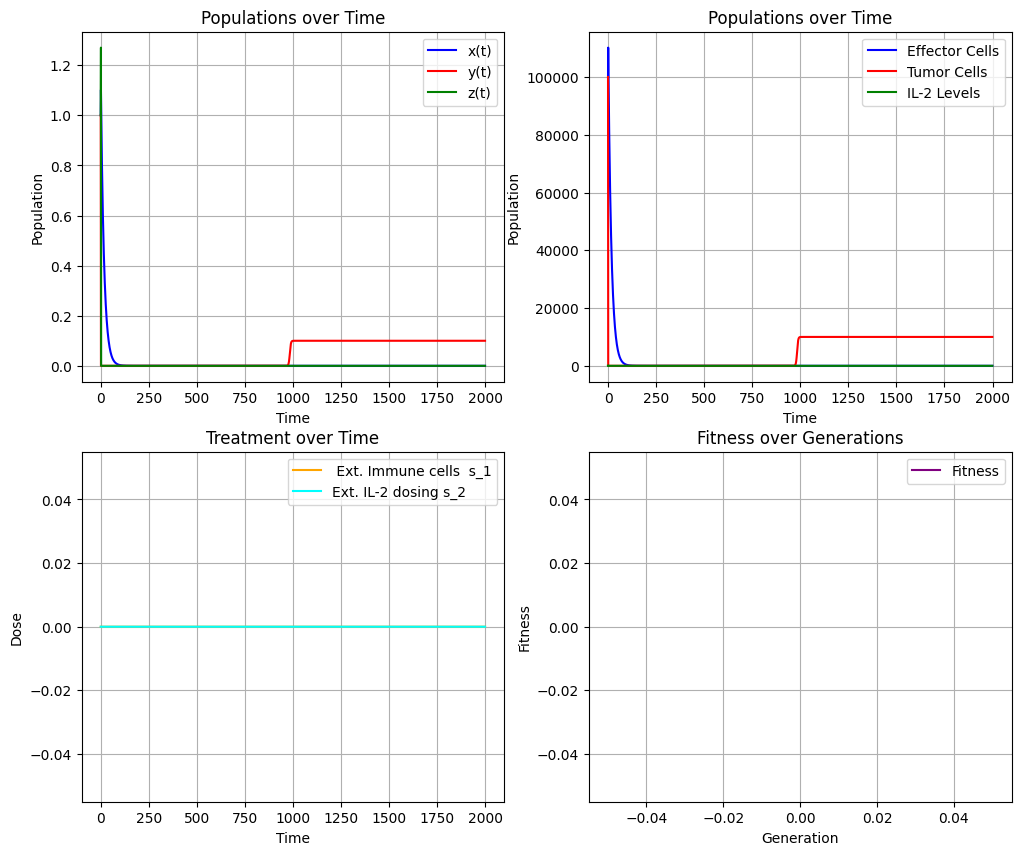

In [3]:
"""
Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
"""

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data('Output_data/simu_data_test0.csv')

print("Generating population dynamics plot...")
plot_quad(t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)

Reading data from Output_data/simu_data_test1.csv
Generating population dynamics plot...


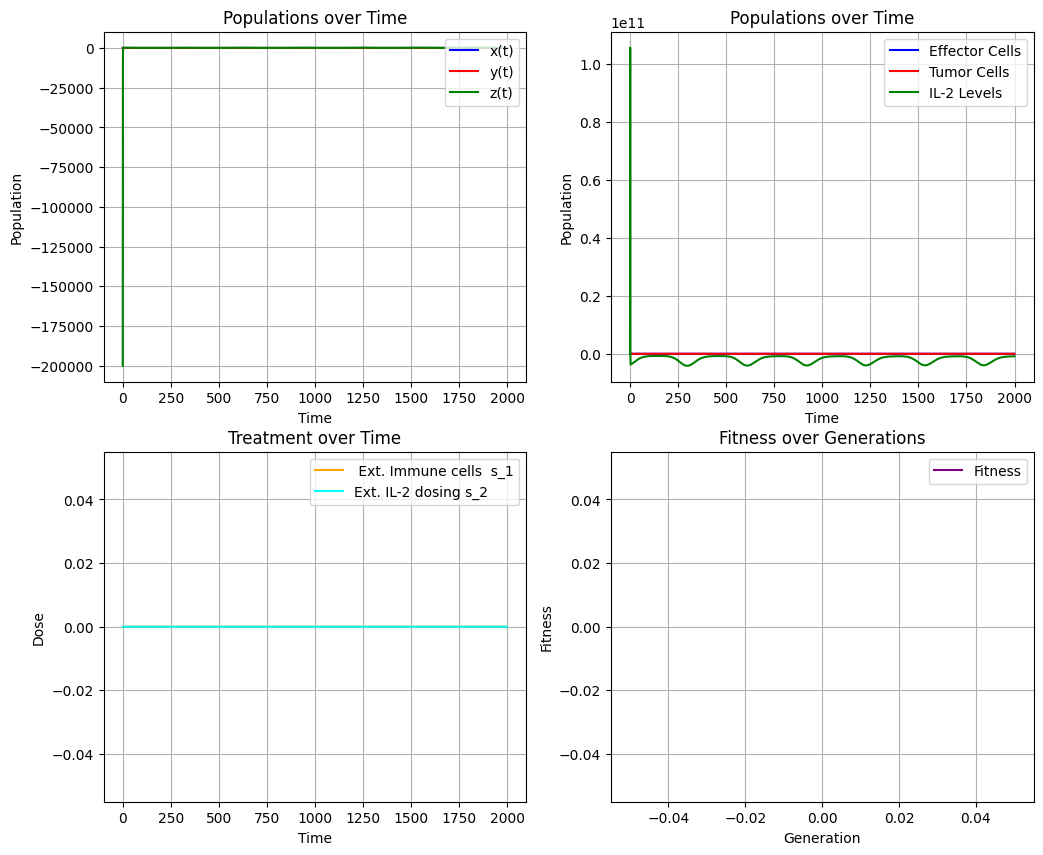

In [4]:
"""
Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
"""

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data('Output_data/simu_data_test1.csv')

print("Generating population dynamics plot...")
plot_quad(t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)

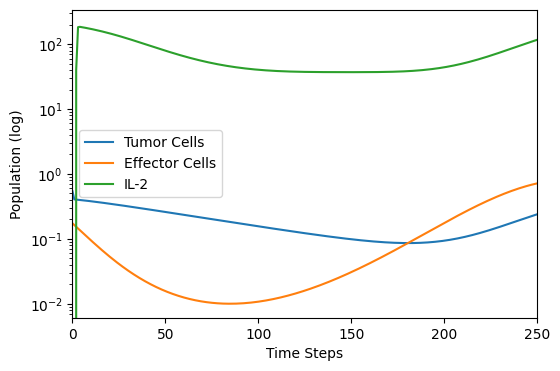

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(t, x, label='Tumor Cells')
plt.plot(t, y, label='Effector Cells')
plt.plot(t, z, label='IL-2')
plt.yscale('log')
plt.xlabel('Time Steps')
plt.ylabel('Population (log)')
plt.xlim(0, 250)
plt.legend()
plt.show()

Reading data from Output_data/simu_data_test2.csv
Generating population dynamics plot...


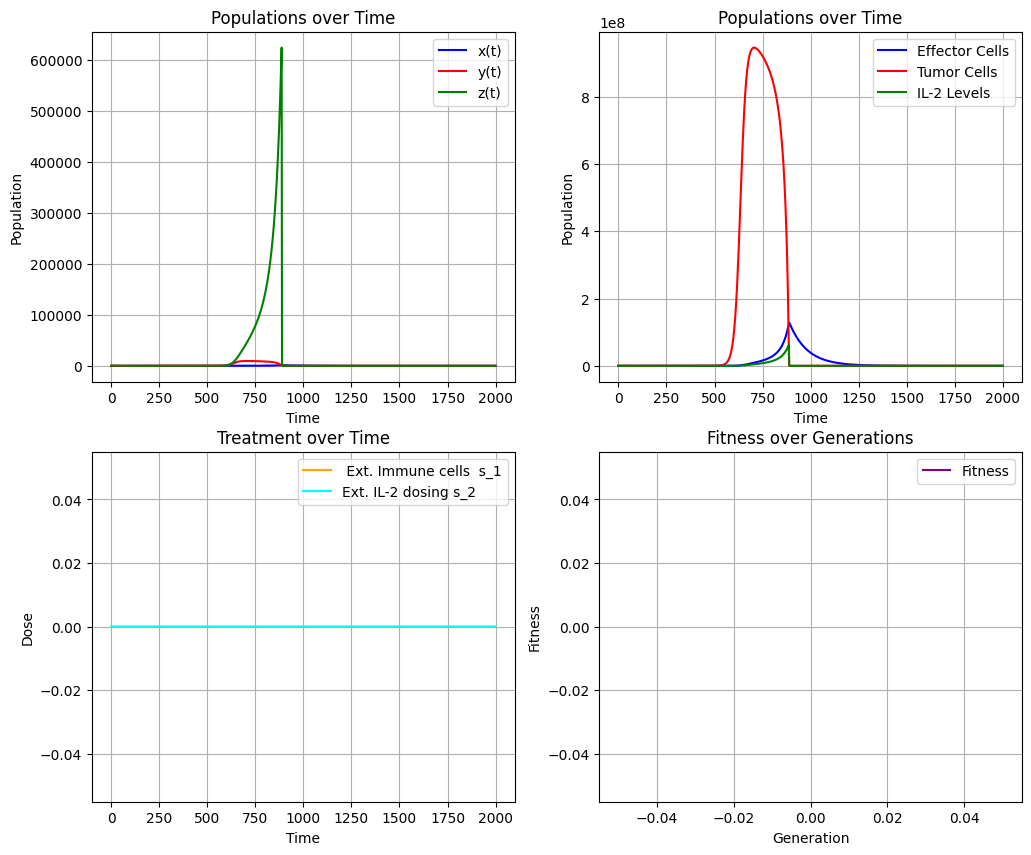

In [6]:
"""
Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
"""

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data('Output_data/simu_data_test2.csv')

print("Generating population dynamics plot...")
plot_quad(t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)


Reading data from Output_data/simu_data_test3.csv
Generating population dynamics plot...


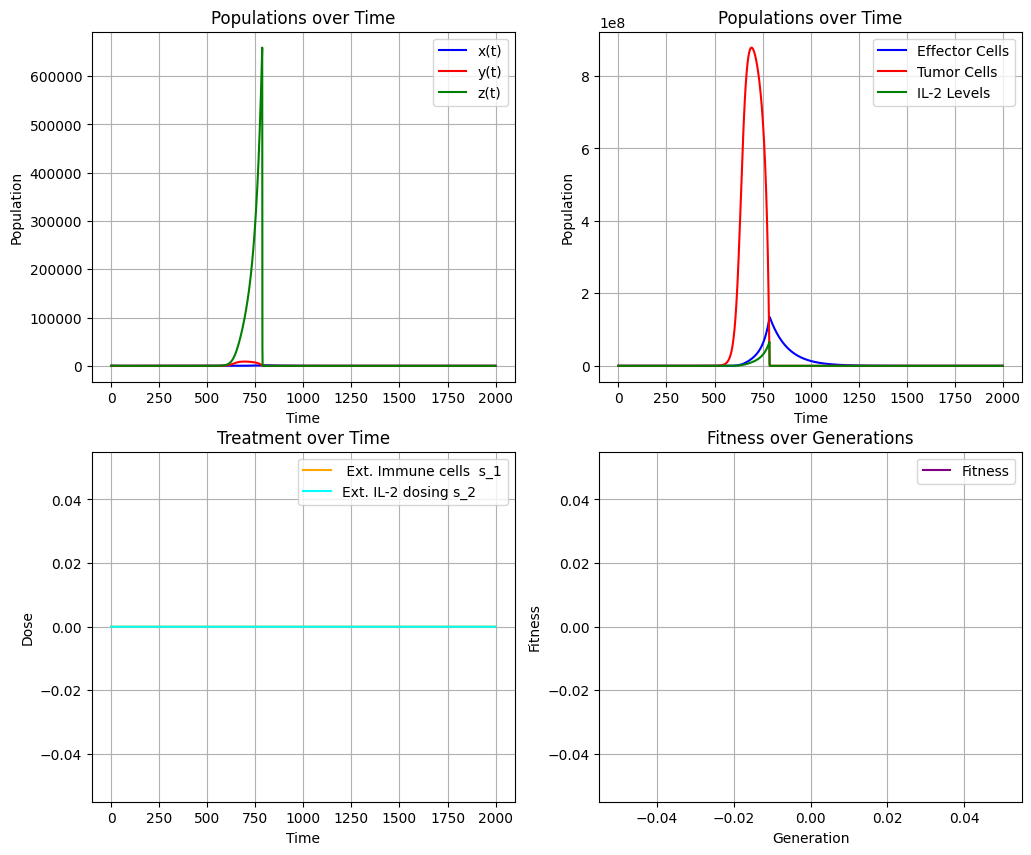

In [7]:
"""
Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
"""

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data('Output_data/simu_data_test3.csv')

print("Generating population dynamics plot...")
plot_quad(t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)


Reading data from Output_data/simu_data_test4.csv
Generating population dynamics plot...


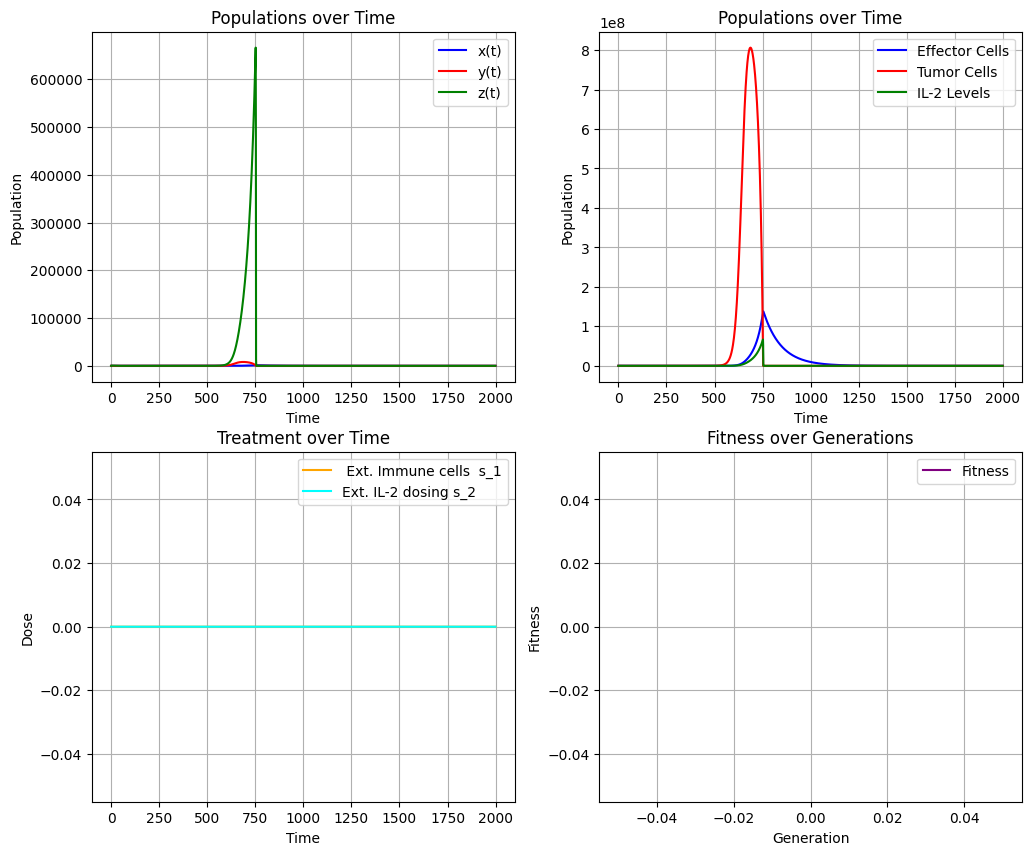

In [8]:
"""
Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
"""

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data('Output_data/simu_data_test4.csv')

print("Generating population dynamics plot...")
plot_quad(t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)


Reading data from Output_data/simu_data_test5.csv
Generating population dynamics plot...


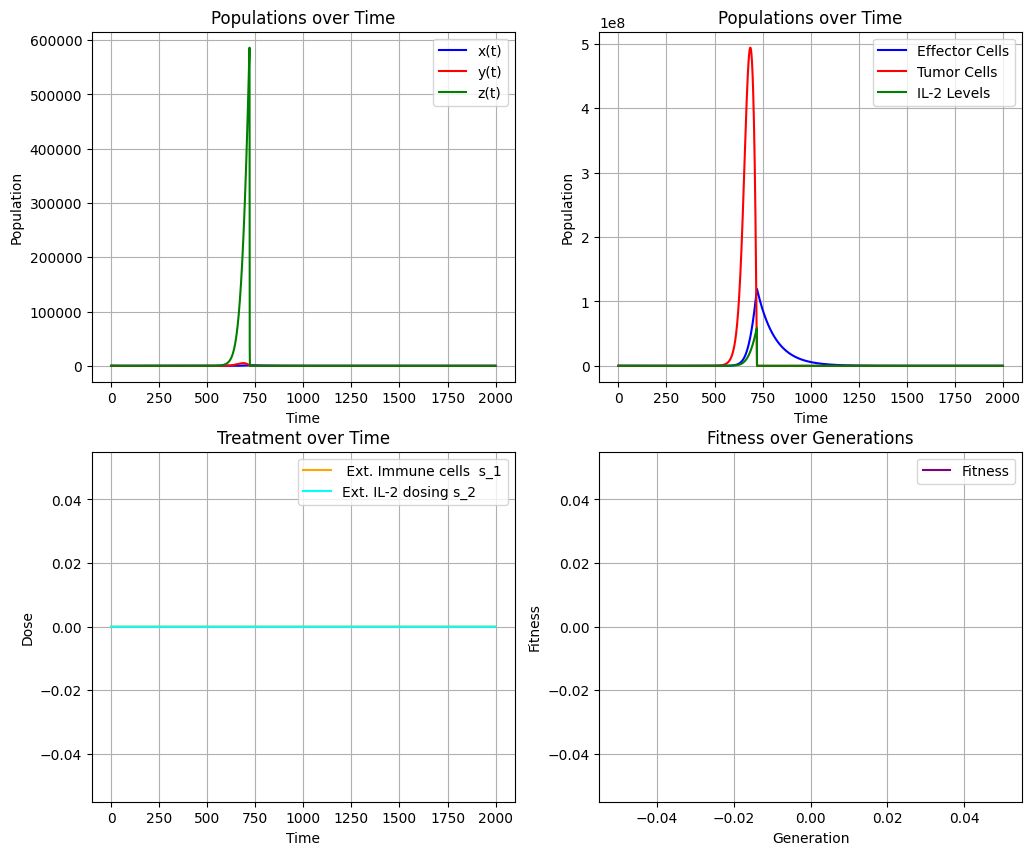

In [9]:
"""
Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
"""

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data('Output_data/simu_data_test5.csv')

print("Generating population dynamics plot...")
plot_quad(t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)

Reading data from Output_data/simu_data_test6.csv
Generating population dynamics plot...


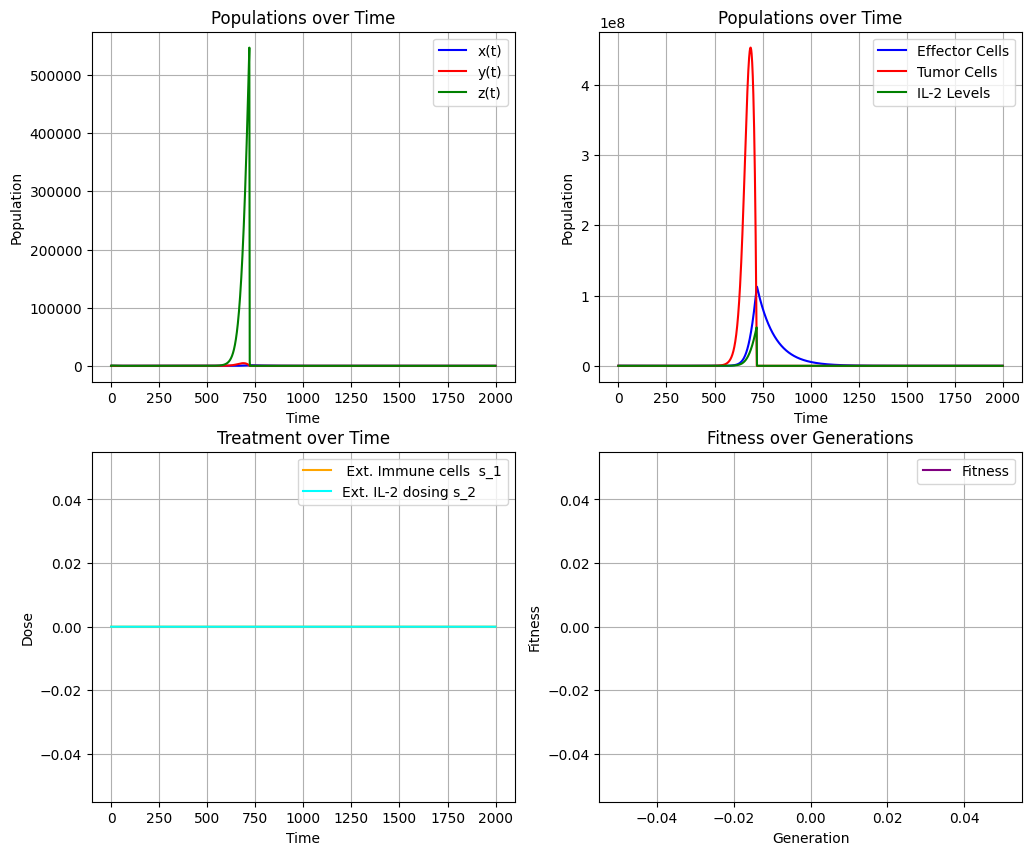

In [10]:
"""
Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
"""

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data('Output_data/simu_data_test6.csv')

print("Generating population dynamics plot...")
plot_quad(t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)

Reading data from Output_data/simu_data_test7.csv
Generating population dynamics plot...


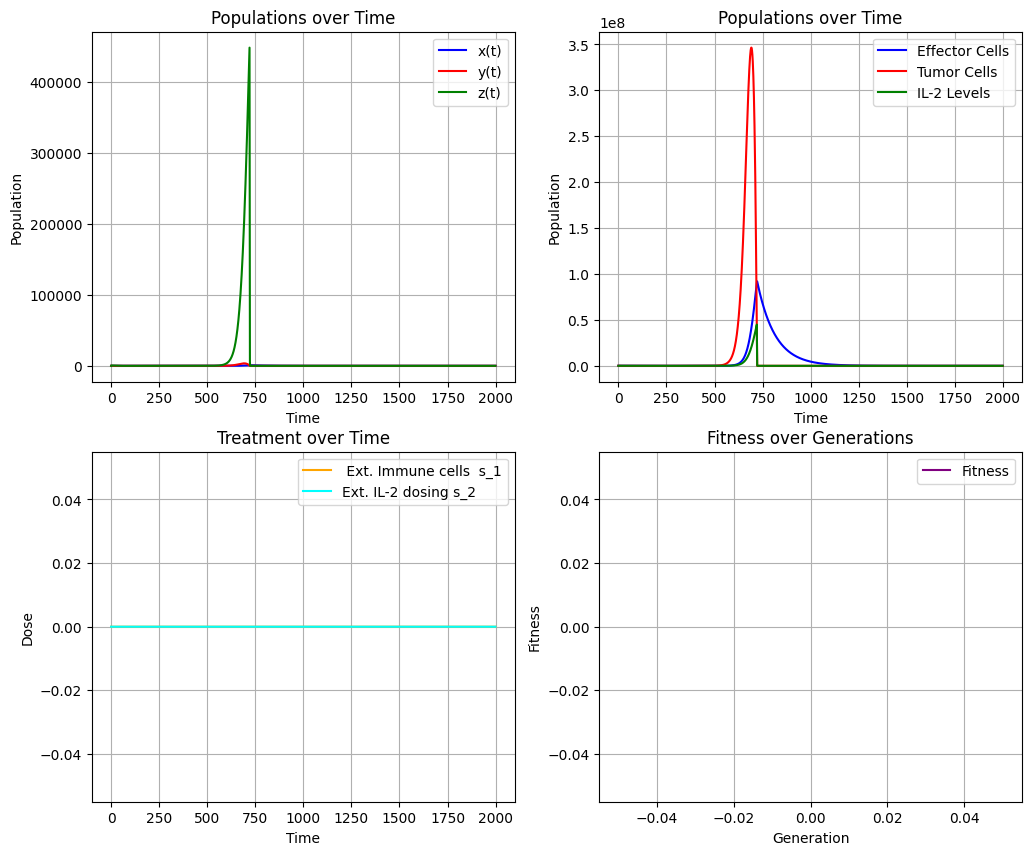

In [11]:
"""
Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
"""

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data('Output_data/simu_data_test7.csv')

print("Generating population dynamics plot...")
plot_quad(t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)

Reading data from Output_data/simu_data_test8.csv
Generating population dynamics plot...


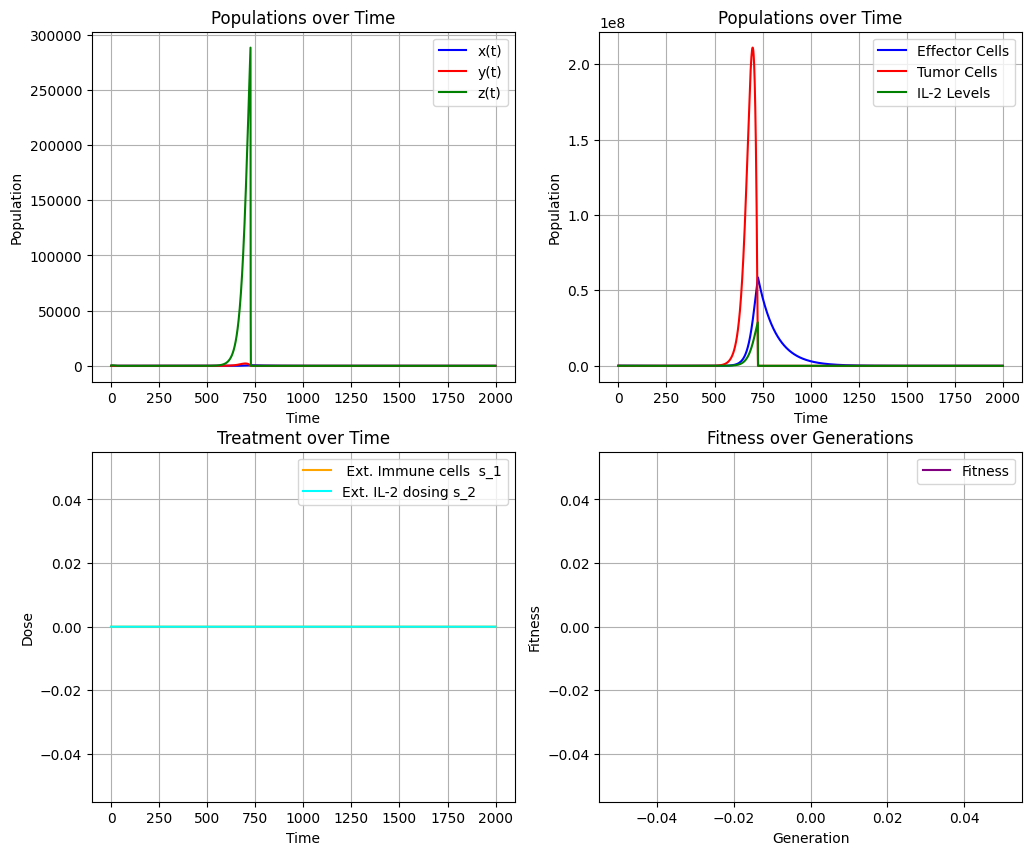

In [12]:
"""
Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
"""

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data('Output_data/simu_data_test8.csv')

print("Generating population dynamics plot...")
plot_quad(t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)

Reading data from Output_data/simu_data_test_ga0.csv
Generating population dynamics plot...


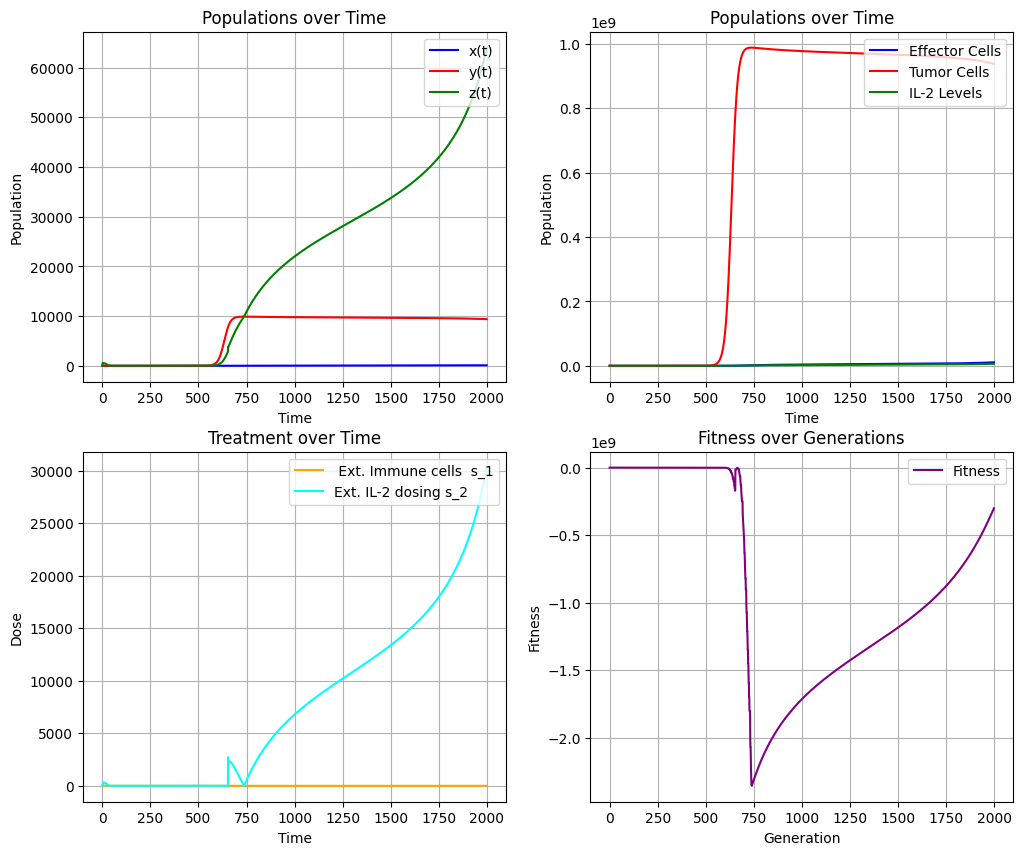

In [13]:
"""
Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
"""

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data('Output_data/simu_data_test_ga0.csv')

print("Generating population dynamics plot...")
plot_quad(t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)


(0.0, 500.0)

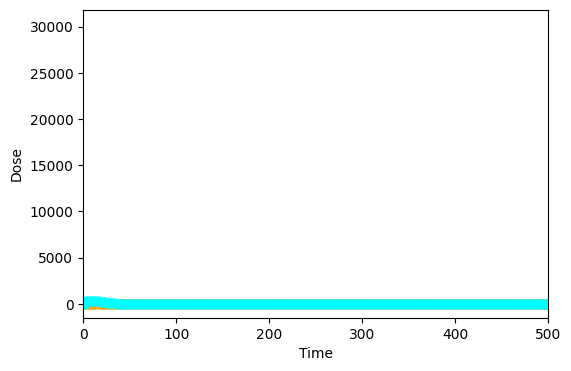

In [14]:
plt.figure(figsize=(6, 4))
generations_treatment = list(range(len(s_1_array)))
plt.plot(t, s_1_array, marker='o', color='orange', label=' Ext. Immune cells  s_1')
plt.plot(t, s_2_array, marker='o', color='cyan', label='Ext. IL-2 dosing s_2')
plt.xlabel('Time')
plt.ylabel('Dose')
plt.xlim(0, 500)

Reading data from Output_data/simu_data_test_ga1.csv
Generating population dynamics plot...


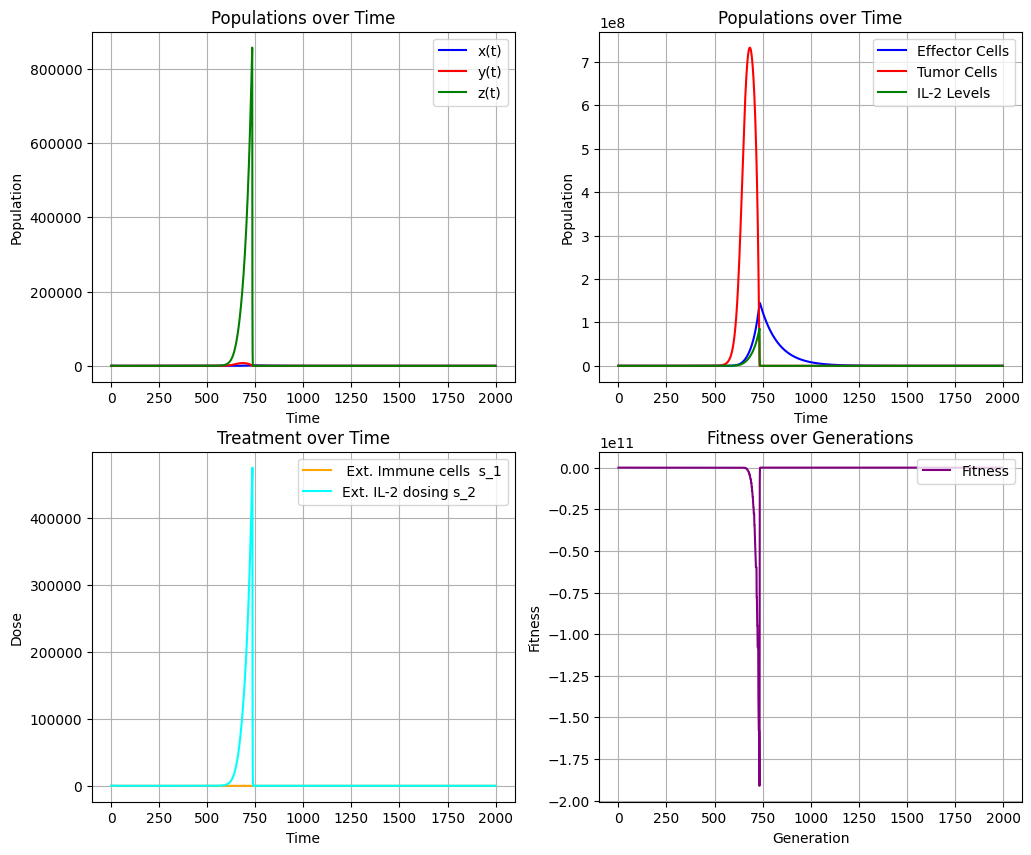

In [15]:
"""
Outputs like: ['Time_Step', 'tau', 'x', 'y', 'z', 'E', 'T', 'IL', 's_1_array', 's_2_array', 'Fitness']
"""

t, tau, x, y, z, E, T, IL, s_1_array, s_2_array, Fitness = load_data('Output_data/simu_data_test_ga1.csv')

print("Generating population dynamics plot...")
plot_quad(t, tau, Fitness, x, y, z, E, T, IL, s_1_array, s_2_array)

(0.0, 500.0)

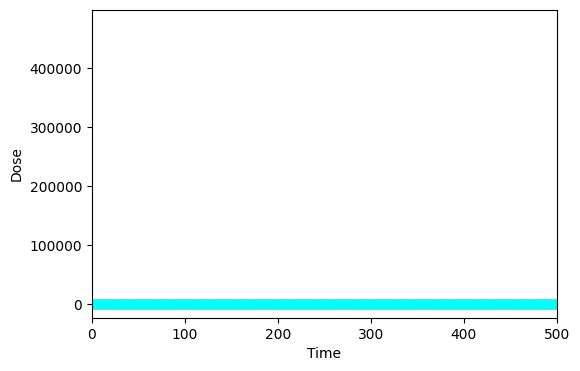

In [16]:
plt.figure(figsize=(6, 4))
generations_treatment = list(range(len(s_1_array)))
plt.plot(t, s_1_array, marker='o', color='orange', label=' Ext. Immune cells  s_1')
plt.plot(t, s_2_array, marker='o', color='cyan', label='Ext. IL-2 dosing s_2')
plt.xlabel('Time')
plt.ylabel('Dose')
plt.xlim(0, 500)

**Analyze sweep over c values.**

**Bifurcation and Lyapunov exponent plot.**

In [ ]:

# Dimensional parameters (same as before)
mu_2_dim = 0.03
p_1_dim  = 0.1245
g_1_dim  = 2e7

g_2_dim  = 1e5
r_2_dim  = 0.18
b_dim    = 1e-9
alpha_dim = 1.0

mu_3_dim = 10.0
p_2_dim  = 5.0
g_3_dim  = 1e3

s_1_dim = 0.0
s_2_dim = 0.0

# Initial dimensional conditions
E0, T0, IL0 = 1e5, 1e5, 1e2

# Time scaling: choose t_s = r_2_dim so scaled r_2 ≈ 1
t_s = r_2_dim

# Time horizon
total_time_dim = 4000.0              # days (like KP)
q_final = t_s * total_time_dim       # scaled horizon (~720)
num_steps = 4000                     # time points
q_grid = np.linspace(0.0, q_final, num_steps)

# c sweep (dimensional)
c_values_dim = np.linspace(0.0, 0.05, 80)  # adjust range/resolution as needed

# Storage for plotting
c_plot = []
y_plot = []

for c_dim in c_values_dim:
    # Non-dimensionalize parameters for this c
    [c, p_1, g_1, mu_2, g_2, b, r_2, alpha,
     mu_3, p_2, g_3, s_1, s_2] = nondim(
        E0, T0, IL0, t_s,
        c_dim, p_1_dim, g_1_dim, mu_2_dim, g_2_dim, b_dim,
        r_2_dim, alpha_dim, mu_3_dim, p_2_dim, g_3_dim,
        s_1_dim, s_2_dim
    )

    # Initial scaled conditions: x=y=z=1
    y0 = [1.0, 1.0, 1.0]

    # Pack constant params (no therapy here s_1=s_2=0)
    params = (c, mu_2, p_1, g_1, 0.0,
              r_2, b, alpha, g_2,
              p_2, g_3, mu_3, 0.0)

    # Solve the ODE once over full time grid (scaled time)
    sol = solve_ivp(
        fun=lambda t, state: kp_coupled(t, state, *params),
        t_span=(q_grid[0], q_grid[-1]),
        y0=y0,
        t_eval=q_grid,
        rtol=1e-7,
        atol=1e-9
    )

    if not sol.success:
        print(f"Integration failed for c={c_dim}: {sol.message}")
        continue

    x_traj, y_traj, z_traj = sol.y

    # Discard transient: keep last 30% of trajectory
    idx_start = int(0.7 * len(q_grid))
    y_tail = y_traj[idx_start:]

    # Option 1: sample all tail points (good for limit cycles)
    # To avoid overplotting, subsample:
    y_tail_sampled = y_tail[::10]

    c_plot.extend([c_dim] * len(y_tail_sampled))
    y_plot.extend(y_tail_sampled)


In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(c_plot, y_plot, s=5, alpha=0.5)
plt.xlabel("Antigenicity c")
plt.ylabel("Scaled tumor volume")
plt.title("Kirschner–Panetta bifurcation diagram (no therapy)")
plt.grid(True)
plt.tight_layout()
plt.show()